##### **<font color=blue>Andrés Felipe Villabona Lozada - COD: 201727965</font>**
##### **<font color=blue>Camilo Torres Rodríguez - COD: 200714035</font>**
##### **<font color=blue>Leidy Araque Molina - COD: 201727196</font>**
##### **<font color=blue>Nicolás Leguizamón - COD: 201727960</font>**

# Project 2
## Image Classification with CNN
-------------------------------


## 1. Direct prediction
   * Download the dataset birds from http://www-cvr.ai.uiuc.edu/ponce_grp/data/.
   * Use [Keras](https://keras.io/) and a CNN from Keras [Applications](https://keras.io/applications/) pretrained on ImageNet, to classify the images in the birds dataset. Construct a confusion matrix that relates the bird classes with the 10 most frequent classes from ImageNet predicted by the model.
   * Discuss the results.
   
## 2. Transfer learning
   * Use the pre-trained CNN model as a feature extractor. Create a new model that replaces the top part of the pretrained CNN with two layers of 256 and 6 neurons respectively.
   * Train the model with the training images from the bird dataset. 
   * Evaluate the performance over the test dataset reporting the results in a confusion matrix. Discuss the results. 
   
## 3. Fine tuning
   * Repeat the experiment from the last question, but this time allow all the layers to be trained. 
   * Compare and discuss the results.

In [1]:
path='C:\\Users\\AsusPC\\Documents\\Analytics\\2018-Vacacional\\DeepLearning\\Proyecto2\\birds'
#path='C:\\Users\\laraquem\\Downloads\\birds'

In [2]:
import os
from skimage import io
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np

images_1=os.listdir(os.path.join(path, 'egret'))
images_2=os.listdir(os.path.join(path, 'mandarin'))
images_3=os.listdir(os.path.join(path, 'owl'))
images_4=os.listdir(os.path.join(path, 'puffin'))
images_5=os.listdir(os.path.join(path, 'toucan'))
images_6=os.listdir(os.path.join(path, 'wood_duck'))

C:\Users\AsusPC\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
images_egret = []
for img in images_1:
    img_path=os.path.join(path, 'egret', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_egret.append(x)

In [4]:
images_mandarin = []
for img in images_2:
    img_path=os.path.join(path, 'mandarin', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_mandarin.append(x)

In [5]:
images_owl = []
for img in images_3:
    img_path=os.path.join(path, 'owl', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_owl.append(x)

In [6]:
images_puffin = []
for img in images_4:
    img_path=os.path.join(path, 'puffin', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_puffin.append(x)

In [7]:
images_toucan = []
for img in images_5:
    img_path=os.path.join(path, 'toucan', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_toucan.append(x)

In [8]:
images_woodduck = []
for img in images_6:
    img_path=os.path.join(path, 'wood_duck', img)
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_woodduck.append(x)

C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corr

## 1. Direct prediction

In [9]:
from keras.applications.vgg16 import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
model_1 = VGG16(weights='imagenet', include_top=True)

## Egret

In [10]:
clasifier_egret_model=[]
for i in range(0,100):
    preds=model_1.predict(images_egret[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_egret_model.append(clas)

In [11]:
import pandas as pd

In [12]:
y_actu = pd.Series(['egret']*100, name='Actual')
y_pred = pd.Series(clasifier_egret_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('egret',ascending=False)[0:10]

Actual,egret
Predicted,
American_egret,0.89
spoonbill,0.08
crane,0.01
little_blue_heron,0.01
recreational_vehicle,0.01


## Mandarin

In [13]:
clasifier_mandarin_model=[]
for i in range(0,100):
    preds=model_1.predict(images_mandarin[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_mandarin_model.append(clas)

In [14]:
y_actu = pd.Series(['mandarin']*100, name='Actual')
y_pred = pd.Series(clasifier_mandarin_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('mandarin',ascending=False)[0:10]

Actual,mandarin
Predicted,
drake,0.78
toucan,0.03
flamingo,0.02
partridge,0.02
hornbill,0.02
goose,0.02
quail,0.01
pelican,0.01
greenhouse,0.01


## owl

In [15]:
clasifier_owl_model=[]
for i in range(0,100):
    preds=model_1.predict(images_owl[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_owl_model.append(clas)

In [16]:
y_actu = pd.Series(['owl']*100, name='Actual')
y_pred = pd.Series(clasifier_owl_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('owl',ascending=False)[0:10]

Actual,owl
Predicted,
ptarmigan,0.40
hen,0.14
kite,0.12
great_grey_owl,0.06
African_grey,0.04
sulphur-crested_cockatoo,0.04
ruffed_grouse,0.03
meerkat,0.03
prairie_chicken,0.02


## Puffin

In [17]:
clasifier_puffin_model=[]
for i in range(0,100):
    preds=model_1.predict(images_puffin[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_puffin_model.append(clas)

In [18]:
y_actu = pd.Series(['puffin']*100, name='Actual')
y_pred = pd.Series(clasifier_puffin_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('puffin',ascending=False)[0:10]

Actual,puffin
Predicted,
oystercatcher,0.17
drake,0.17
toucan,0.13
albatross,0.10
magpie,0.09
king_penguin,0.07
black_stork,0.06
goose,0.04
water_ouzel,0.03


## Toucan

In [19]:
clasifier_toucan_model=[]
for i in range(0,100):
    preds=model_1.predict(images_toucan[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_toucan_model.append(clas)

In [20]:
y_actu = pd.Series(['toucan']*100, name='Actual')
y_pred = pd.Series(clasifier_toucan_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('toucan',ascending=False)[0:10]

Actual,toucan
Predicted,
toucan,0.96
hornbill,0.03
shovel,0.01


## wood_duck

In [21]:
clasifier_woodduck_model=[]
for i in range(0,100):
    preds=model_1.predict(images_woodduck[i])
    data=decode_predictions(preds, top=1)
    clas=data[0][0][1]
    clasifier_woodduck_model.append(clas)

In [22]:
y_actu = pd.Series(['wood_duck']*100, name='Actual')
y_pred = pd.Series(clasifier_woodduck_model, name='Predicted')
df_confusion = pd.crosstab(y_pred,y_actu).apply(lambda r: r/r.sum(), axis=0)
df_confusion.sort_values('wood_duck',ascending=False)[0:10]

Actual,wood_duck
Predicted,
drake,0.88
red-breasted_merganser,0.02
toucan,0.02
American_coot,0.01
black_swan,0.01
brambling,0.01
dragonfly,0.01
king_penguin,0.01
magpie,0.01


En la siguiente imagen resumimos por especie lo obtenido al hacer la clasificación con VGG16

<img src="Punto1_class.png" width="85%" />

En la clasificación se observa que las especies Egret y Toucan son las que mejor predice dado que más del 89% de las imagenes correspondiente a cada especie está bien identificada. Por otro lado, la especie mandarin la predice como drake en un 78%, observando las imagenes vemos que estos pájaros se parecen en el color de sus cuerpos pero su mayor diferencia esta en la forma de la cabeza.

<img src="Mandarin.png" width="55%" />

Por otro lado para la especie owl el 40% de esta la predice como ptarmigan el cual corresponde a un pájaro blanco

<img src="Owl.png" width="55%" />

La especie puffin es la que más mal predice pues no hay una categoría con un porcentaje alto, por último la especie wood duck el 88% la predice como drake y al observar las imagenes se identifica cuales son las semejanzas entre estos pájaros, al igual que el pájaro mandarin tiene colores semejantes en su cuerpo pero en este caso tambien el color es semejante en la cabeza.

<img src="Wood.png" width="55%" />

## 2. Transfer learning

Para esta parte cargamos nuevamente las imagenes por carpeta pero de tamaño 32 x 32

In [23]:
images_egret = []
for img in images_1:
    img_path=os.path.join(path, 'egret', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_egret.append(x)

In [24]:
images_mandarin = []
for img in images_2:
    img_path=os.path.join(path, 'mandarin', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_mandarin.append(x)

In [25]:
images_owl = []
for img in images_3:
    img_path=os.path.join(path, 'owl', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_owl.append(x)

In [26]:
images_puffin = []
for img in images_4:
    img_path=os.path.join(path, 'puffin', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_puffin.append(x)

In [27]:
images_toucan = []
for img in images_5:
    img_path=os.path.join(path, 'toucan', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_toucan.append(x)

In [28]:
images_woodduck = []
for img in images_6:
    img_path=os.path.join(path, 'wood_duck', img)
    img = image.load_img(img_path, target_size=(32, 32))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    images_woodduck.append(x)

C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 80000 bytes but only got 0. Skipping tag 64640
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2652897280 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2656043008 bytes but only got 0. Skipping tag 2
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corrupt EXIF data.  Expecting to read 65536 bytes but only got 0. Skipping tag 3
  " Skipping tag %s" % (size, len(data), tag))
C:\Users\AsusPC\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:725: UserWarning: Possibly corr

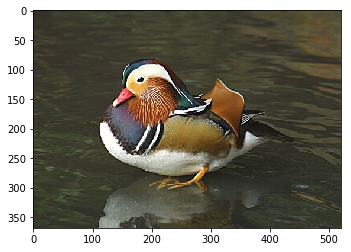

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img_path=os.path.join(path, 'mandarin', 'man001.jpg')
img = image.load_img(img_path)
x = img_to_array(img) 
plt.imshow(img)

In [30]:
x=images_egret+images_mandarin+images_owl+images_puffin+images_toucan+images_woodduck
x = np.vstack( x )

In [31]:
x.shape

(600, 32, 32, 3)

In [32]:
y = ([0]*100+[1]*100+[2]*100+[3]*100+[4]*100+[5]*100)
y = np.vstack( y )

In [33]:
y.shape

(600, 1)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=79)

In [35]:
from keras.utils import np_utils

In [36]:
nb_classes = y_train.max() + 1
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [37]:
from keras.applications.vgg16 import VGG16
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [38]:
X_train_new = model_vgg16.predict(X_train) #Crea la nueva X_train basada en VGG16
X_train_new.shape

(420, 1, 1, 512)

In [39]:
#X_train_new

In [39]:
y_train.shape

(420, 1)

In [40]:
# Create model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_trans = Sequential()
model_trans.add(Flatten(input_shape=(1,1,512)))


model_trans.add(Dense(units=256, input_dim=1))
model_trans.add(Activation('relu'))

model_trans.add(Dropout(0.5))      

model_trans.add(Dense(units=6, input_dim=1))
model_trans.add(Activation('softmax'))

# model summary
model_trans.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1542      
_________________________________________________________________
activation_2 (Activation)    (None, 6)                 0         
Total params: 132,870
Trainable params: 132,870
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile model
model_trans.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [42]:
X_test_new = model_vgg16.predict(X_test) #Crea la nueva X_test basada en VGG16

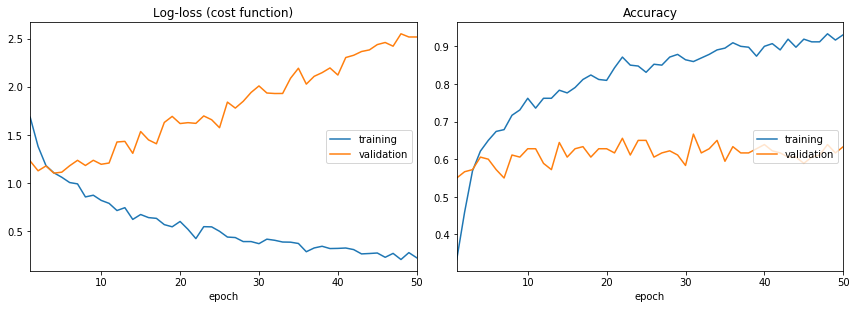

In [43]:
# Fit the model

from livelossplot import PlotLossesKeras
%matplotlib inline

model_trans.fit(X_train_new, y_train, validation_data=[X_test_new, y_test], 
                batch_size=1, epochs=50, verbose=1,
                callbacks=[PlotLossesKeras()])

In [44]:
# evaluate the model
scores = model_trans.evaluate(X_test_new, y_test)
print("\n%s: %.2f%%" % (model_trans.metrics_names[1], scores[1]*100))

180/180 [==============================] - 0s 72us/step

acc: 63.33%


In [45]:
model_trans_pred_test = model_trans.predict_classes(X_test_new)

In [59]:
y_actu = pd.Series(y_test.flatten(), name='Actual')
y_pred = pd.Series(model_trans_pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu,y_pred).apply(lambda r: r/r.sum(), axis=0)
df_confusion

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,0.580645,0.032258,0.04,0.064516,0.000000,0.179487
1,0.032258,0.612903,0.04,0.064516,0.000000,0.179487
2,0.193548,0.032258,0.84,0.129032,0.043478,0.000000
3,0.161290,0.064516,0.00,0.580645,0.000000,0.076923
4,0.032258,0.096774,0.04,0.032258,0.826087,0.076923
5,0.000000,0.161290,0.04,0.129032,0.130435,0.487179


#### Discuss the results

Al evaluar el modelo en la base test vemos que la categoría que menos predice es wood duck (5) con un 58% de aciertos y la que mejor predice es toucan (4) con un 82%, cabe resaltar que con el proceso realizado en el punto 1 la especie puffin no la identifica correctamente y con este modelo acierta en un 58%.

## 3. Fine tuning

In [47]:
# Create model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model_tune = Sequential()
model_tune.add(Flatten(input_shape=(1,1,512)))


model_tune.add(Dense(units=256, input_dim=1))
model_tune.add(Activation('relu'))

model_tune.add(Dropout(0.5))      

model_tune.add(Dense(units=6, input_dim=1))
model_tune.add(Activation('softmax'))

# model summary
model_tune.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 1542      
_________________________________________________________________
activation_4 (Activation)    (None, 6)                 0         
Total params: 132,870
Trainable params: 132,870
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Fine tuning

for layer in model_tune.layers:
    layer.trainable = False

In [49]:
# let's visualize layer names and layer indices to see how many layers
# we should freeze:

for i, layer in enumerate(model_tune.layers):
    print(i, layer.name)

0 flatten_2
1 dense_3
2 activation_3
3 dropout_2
4 dense_4
5 activation_4


In [50]:
# we chose to train the top 2 inception blocks, i.e. we will freeze
# the first 3 layers and unfreeze the rest:
for layer in model_tune.layers[:3]:
    layer.trainable = False
for layer in model_tune.layers[3:]:
    layer.trainable = True

In [51]:
# Compile model
model_tune.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [52]:
X_test_new = model_vgg16.predict(X_test) #Crea la nueva X_test basada en VGG16

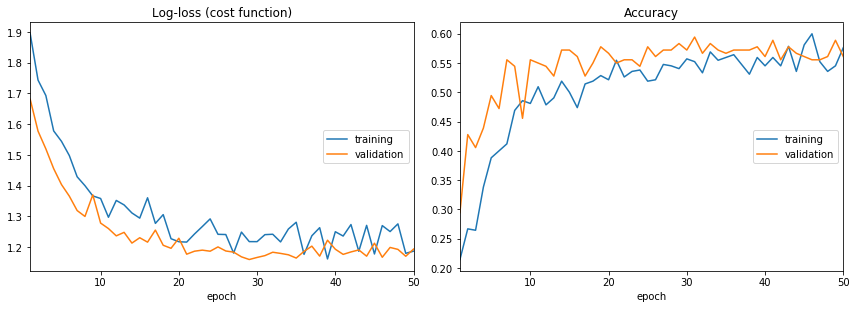

In [53]:
# Fit the model

from livelossplot import PlotLossesKeras
%matplotlib inline

model_tune.fit(X_train_new, y_train, validation_data=[X_test_new, y_test], 
          batch_size=1, epochs=50, verbose=1,
          callbacks=[PlotLossesKeras()])

In [54]:
# evaluate the model
scores = model_tune.evaluate(X_test_new, y_test)
print("\n%s: %.2f%%" % (model_tune.metrics_names[1], scores[1]*100))

180/180 [==============================] - 0s 72us/step

acc: 56.11%


In [55]:
model_tune_pred_test = model_tune.predict_classes(X_test_new)

In [58]:
y_actu = pd.Series(y_test.flatten(), name='Actual')
y_pred = pd.Series(model_tune_pred_test, name='Predicted')
df_confusion = pd.crosstab(y_actu,y_pred).apply(lambda r: r/r.sum(), axis=0)
df_confusion

Predicted,0,1,2,3,4,5
Actual,,,,,,
0,0.487179,0.000000,0.043478,0.272727,0.000000,0.107143
1,0.076923,0.483871,0.000000,0.136364,0.081081,0.214286
2,0.128205,0.064516,0.869565,0.136364,0.081081,0.000000
3,0.179487,0.161290,0.043478,0.409091,0.054054,0.142857
4,0.025641,0.032258,0.000000,0.045455,0.648649,0.035714
5,0.102564,0.258065,0.043478,0.000000,0.135135,0.500000


#### Compare and discuss the results

Al evaluar el modelo con la metodología fine tuning, en la base test vemos que la categoría que menos predice es puffin (3) con un 41% de aciertos y la que mejor predice es owl (2) con un 87%, además al comparar el resultado del AUC obtenido en la validación, vemos que el que mejor predice corresponde al modelo realizado en transfer learning pues es un 7% más alto.